In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('cleaned.csv',index_col='Date',parse_dates=True)

In [97]:
df.tail()

,height
Date,
24-05-2024 21:30,20
24-05-2024 22:00,20
24-05-2024 22:30,20
24-05-2024 23:00,18
24-05-2024 23:30,15


In [98]:
# only select even index rows
# df = df.iloc[::2]
# df

<Axes: xlabel='Date'>

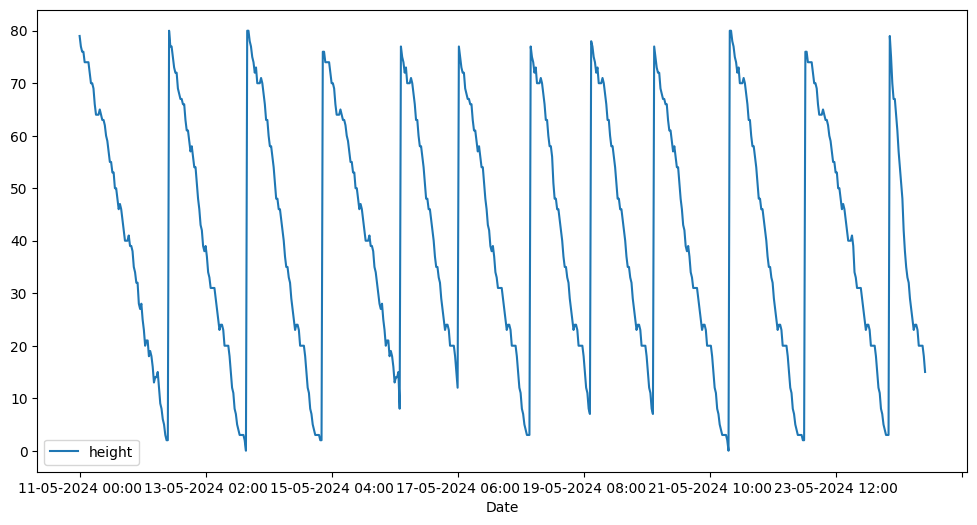

In [99]:
df.plot(figsize=(12,6))

count    672.000000
mean      41.305060
std       22.810058
min        0.000000
25%       23.000000
50%       40.000000
75%       63.000000
max       80.000000
Name: height, dtype: float64


<Axes: title={'center': 'Height Distribution'}, ylabel='Frequency'>

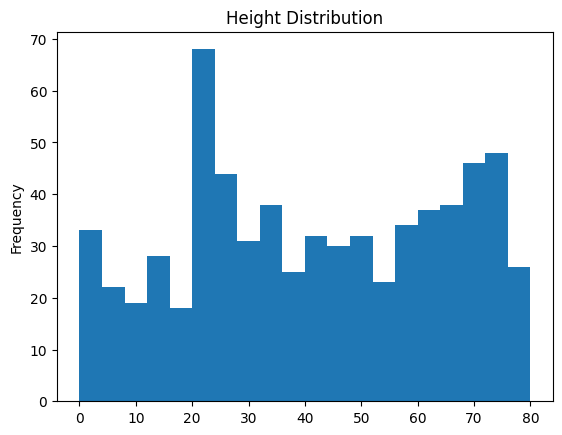

In [100]:
print(df['height'].describe())
df['height'].plot(kind='hist', bins=20, title='Height Distribution')


In [101]:
df

,height
Date,
11-05-2024 00:00,79
11-05-2024 00:30,77
11-05-2024 01:00,76
11-05-2024 01:30,76
11-05-2024 02:00,74
...,...
24-05-2024 21:30,20
24-05-2024 22:00,20
24-05-2024 22:30,20


In [102]:
# split the height into 3 categories 
# ht > 50 empty
# 50 <= ht < 20 half
# ht >= 20 full

# create a new dataframe with the new column
df2 = df.copy()
df2['category'] = np.where(df2['height'] > 50, 'empty', np.where(df2['height'] < 20, 'half', 'full'))
df2


,height,category
Date,,
11-05-2024 00:00,79,empty
11-05-2024 00:30,77,empty
11-05-2024 01:00,76,empty
11-05-2024 01:30,76,empty
11-05-2024 02:00,74,empty
...,...,...
24-05-2024 21:30,20,full
24-05-2024 22:00,20,full
24-05-2024 22:30,20,full


In [103]:
df

,height
Date,
11-05-2024 00:00,79
11-05-2024 00:30,77
11-05-2024 01:00,76
11-05-2024 01:30,76
11-05-2024 02:00,74
...,...
24-05-2024 21:30,20
24-05-2024 22:00,20
24-05-2024 22:30,20


In [104]:
# encode the height category
df2['category'] = df2['category'].astype('category')
df2['category'] = df2['category'].cat.codes
df2

,height,category
Date,,
11-05-2024 00:00,79,0
11-05-2024 00:30,77,0
11-05-2024 01:00,76,0
11-05-2024 01:30,76,0
11-05-2024 02:00,74,0
...,...,...
24-05-2024 21:30,20,1
24-05-2024 22:00,20,1
24-05-2024 22:30,20,1


In [105]:
# predict the height category
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df2.drop('category', axis=1)
y = df2['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)




1.0

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [107]:
# results = seasonal_decompose(df['height'])
# results.plot();

In [108]:
len(df)

672

In [109]:
train = df.iloc[0:652]
test = df.iloc[652:]

In [110]:
train.shape

(652, 1)

In [111]:
test.shape

(20, 1)

In [112]:
y_pred = clf.predict(test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
      dtype=int8)

In [113]:
test


,height
Date,
24-05-2024 14:00,51
24-05-2024 14:30,48
24-05-2024 15:00,42
24-05-2024 15:30,38
24-05-2024 16:00,35
24-05-2024 16:30,33
24-05-2024 17:00,32
24-05-2024 17:30,29
24-05-2024 18:00,27


In [114]:
# combine test height and predicted category
# change y_pred back to category

y_pred = pd.Series(y_pred)
y_pred = np.where(y_pred == 0, 'empty', np.where(y_pred == 1, 'half', 'full'))

# display both test height and predicted category side by side

data = {'height': test['height'], 'category': y_pred}
df3 = pd.DataFrame(data)
df3

,height,category
Date,,
24-05-2024 14:00,51,empty
24-05-2024 14:30,48,half
24-05-2024 15:00,42,half
24-05-2024 15:30,38,half
24-05-2024 16:00,35,half
24-05-2024 16:30,33,half
24-05-2024 17:00,32,half
24-05-2024 17:30,29,half
24-05-2024 18:00,27,half


In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [116]:
df.head(),df.tail()

(                  height
 Date                    
 11-05-2024 00:00      79
 11-05-2024 00:30      77
 11-05-2024 01:00      76
 11-05-2024 01:30      76
 11-05-2024 02:00      74,
                   height
 Date                    
 24-05-2024 21:30      20
 24-05-2024 22:00      20
 24-05-2024 22:30      20
 24-05-2024 23:00      18
 24-05-2024 23:30      15)

In [117]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [118]:
scaled_train[:10]

array([[0.9875],
       [0.9625],
       [0.95  ],
       [0.95  ],
       [0.925 ],
       [0.925 ],
       [0.925 ],
       [0.925 ],
       [0.9   ],
       [0.875 ]])

In [119]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [120]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [121]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.9875 0.9625 0.95   0.95   0.925  0.925  0.925  0.925  0.9    0.875
 0.875  0.8625]
Predict this y: 
 [[0.825]]


In [122]:
X.shape

(1, 12, 1)

In [123]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [125]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [126]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
# fit model
model.fit(generator,epochs=10)

Epoch 1/10
640/640 [==============================] - 5s 4ms/step - loss: 0.0408
Epoch 2/10
640/640 [==============================] - 3s 4ms/step - loss: 0.0202
Epoch 3/10
640/640 [==============================] - 3s 4ms/step - loss: 0.0169
Epoch 4/10
640/640 [==============================] - 4s 6ms/step - loss: 0.0153
Epoch 5/10
640/640 [==============================] - 4s 7ms/step - loss: 0.0148
Epoch 6/10
640/640 [==============================] - 4s 7ms/step - loss: 0.0140
Epoch 7/10
640/640 [==============================] - 4s 7ms/step - loss: 0.0137
Epoch 8/10
640/640 [==============================] - 4s 7ms/step - loss: 0.0134
Epoch 9/10
640/640 [==============================] - 4s 7ms/step - loss: 0.0130
Epoch 10/10
640/640 [==============================] - 4s 6ms/step - loss: 0.0133


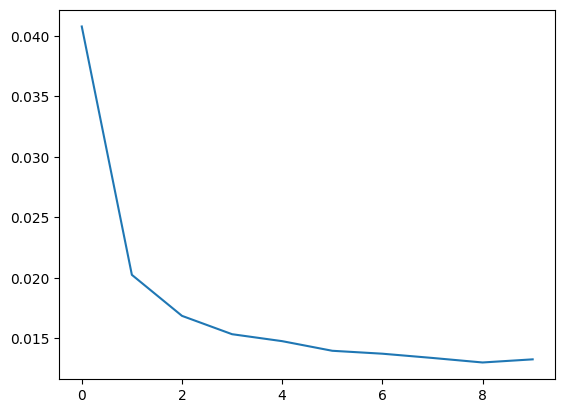

In [128]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [129]:
last_train_batch = scaled_train[-12:]

In [130]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [131]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 346ms/step


array([[0.6428663]], dtype=float32)

In [132]:
scaled_test[0]

array([0.6375])

In [133]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 49ms/step


In [134]:
test_predictions

[array([0.6428663], dtype=float32),
 array([0.6086354], dtype=float32),
 array([0.57377243], dtype=float32),
 array([0.5389804], dtype=float32),
 array([0.5057878], dtype=float32),
 array([0.47405556], dtype=float32),
 array([0.44382244], dtype=float32),
 array([0.41518724], dtype=float32),
 array([0.3880895], dtype=float32),
 array([0.36251155], dtype=float32),
 array([0.33841148], dtype=float32),
 array([0.31579444], dtype=float32),
 array([0.2946203], dtype=float32),
 array([0.2748324], dtype=float32),
 array([0.25630876], dtype=float32),
 array([0.23851214], dtype=float32),
 array([0.22168596], dtype=float32),
 array([0.20645839], dtype=float32),
 array([0.19363984], dtype=float32),
 array([0.1840652], dtype=float32)]

In [135]:
test.head()

,height
Date,
24-05-2024 14:00,51
24-05-2024 14:30,48
24-05-2024 15:00,42
24-05-2024 15:30,38
24-05-2024 16:00,35


In [136]:
true_predictions = scaler.inverse_transform(test_predictions)

In [137]:
test['Predictions'] = true_predictions

C:\Users\ROHITH M\AppData\Local\Temp\ipykernel_36144\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [138]:
test.shape

(20, 2)

In [139]:
test

,height,Predictions
Date,,
24-05-2024 14:00,51,51.429305
24-05-2024 14:30,48,48.690834
24-05-2024 15:00,42,45.901794
24-05-2024 15:30,38,43.118434
24-05-2024 16:00,35,40.463023
24-05-2024 16:30,33,37.924445
24-05-2024 17:00,32,35.505795
24-05-2024 17:30,29,33.214979
24-05-2024 18:00,27,31.047161


<Axes: xlabel='Date'>

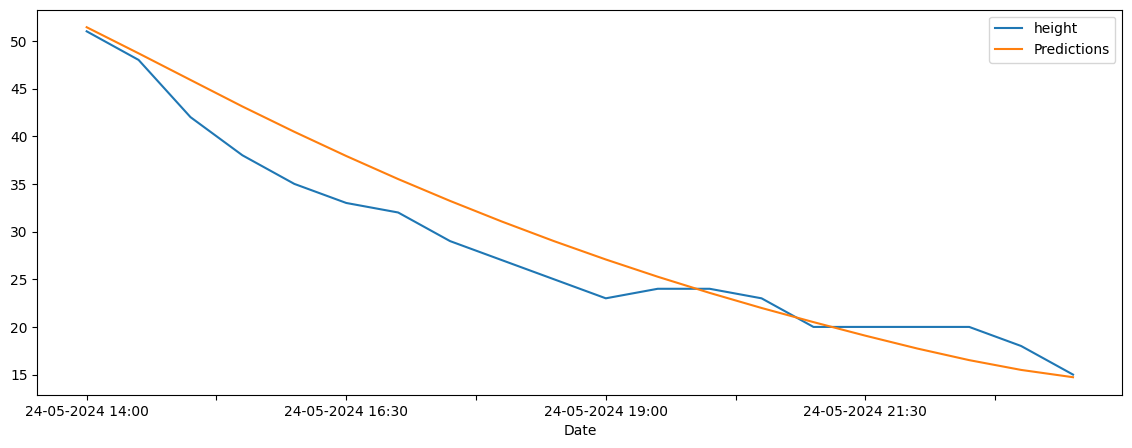

In [140]:
test.plot(figsize=(14,5))

In [141]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['height'],test['Predictions']))
print(rmse)

3.1839680359579696
